In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline


# The original path of h5 file
train_dataset = h5py.File('/content/drive/MyDrive/ams_595_python_teaching/dataset/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/drive/MyDrive/ams_595_python_teaching/dataset/test_catvnoncat.h5', "r")

"""
# The path of h5 file from my laptop
train_dataset = h5py.File('C:/Users/Xiaoyong/Desktop/train_catvnoncat.h5', "r")         # change the path
test_dataset = h5py.File('C:/Users/Xiaoyong/Desktop/test_catvnoncat.h5', "r")           # change the path
""" 

print(train_dataset.keys())
print(train_dataset['train_set_x'])             # x: images of shape (64,64, 3), X contains 209 images (features)
print(train_dataset['train_set_y'])             # y: corresponding boolean values (labels)
print(train_dataset['list_classes'])            # we have two classes


<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [2]:
train_X = np.array(train_dataset["train_set_x"][:])
train_Y = np.array(train_dataset["train_set_y"][:])
test_X = np.array(test_dataset["test_set_x"][:])            #  test set features
test_Y = np.array(test_dataset["test_set_y"][:])            #  test set labels
classes = np.array(test_dataset["list_classes"][:])
print(train_X.shape)
print(train_Y.shape)
print(classes.shape)
print(classes) # numpy.bytes_
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))
print(train_Y.shape)
print(test_Y.shape)


(209, 64, 64, 3)
(209,)
(2,)
[b'non-cat' b'cat']
(1, 209)
(1, 50)


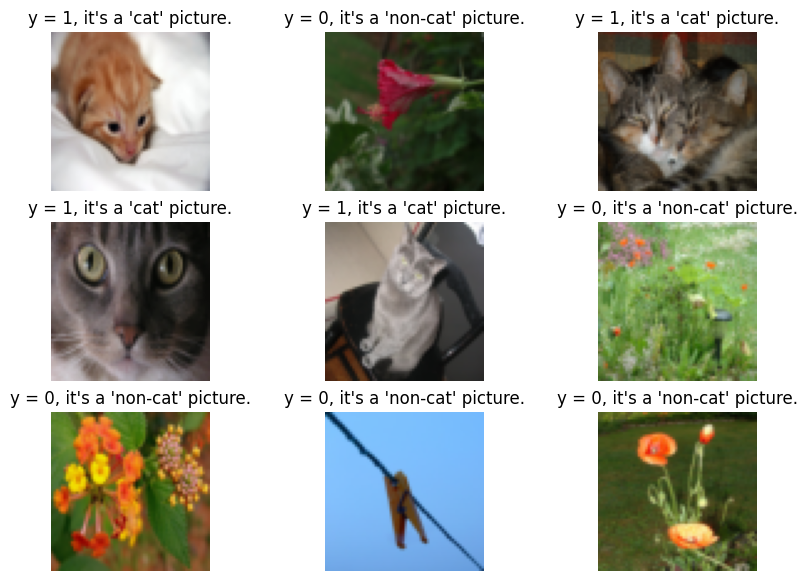

In [3]:
# the indices of images that we want to look at
indices = [57, 58, 59, 60, 61, 62, 63, 64, 65]          # I expand the indeices to 9 elements

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 3                                                # Set with 3 rows and 3 columns
columns = 3

for i in indices:                                       # loop through to plot each figure
  fig.add_subplot(rows, columns, i - 56)                # i - 56 is the subplot indices, 1,2,3,4
  plt.imshow(train_X[i])
  plt.axis('off')
  plt.title("y = " + str(train_Y[0, i]) + ", it's a '" + classes[np.squeeze(train_Y[:, i])].decode("utf-8") +  "' picture.")

The indeics for incorrect predictions are: [5, 13, 14, 16, 21, 22, 27, 29, 34, 35, 36, 38, 39, 43, 44, 45, 49]


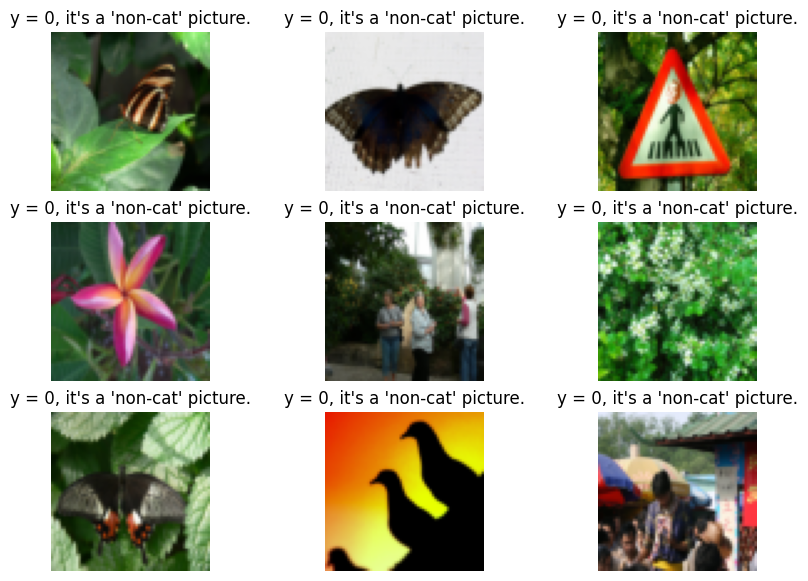

In [4]:
# the indices of images that we want to look at
indices = [15, 16, 17, 18, 19, 20, 21, 22, 23]          # I expand the indeices to 9 elements

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 3                                                # Set with 3 rows and 3 columns
columns = 3

"""
for i in indices:
  fig.add_subplot(rows, columns, i - 14)                # i - 14 is the subplot indices, 1,2,...,9
  plt.imshow(test_X[i])
  plt.axis('off')
  plt.title("y = " + str(test_Y[0, i]) + ", it's a '" + classes[np.squeeze(test_Y[:, i])].decode("utf-8") +  "' picture.")
"""
# Find out the indeices for incorrect predictions (non-cat cases)
non_cat_indeices = []
for i in range(0, test_Y.shape[1]) :                    # Loop though indexing 0 to 50.       test_Y.shape: (1,50)
  if np.squeeze(test_Y[:, i]) == 0:                     # 0 denotes'non-cat' and 1 denotes 'cat'
    non_cat_indeices.append(i)                          # Collect the indeices for incorrect predictions (non-cat pictures)
print('The indeics for incorrect predictions are:', non_cat_indeices)


# Only display the images of the first 9 failed-case 
for i in range(0, 9):                                   # loop through the first 9 element of non_cat_indeices
  a = non_cat_indeices[i]
  fig.add_subplot(rows, columns, i+1)                   # i + 1 is the subplot indices, 1,2,...,9
  plt.imshow(test_X[a])                                 # show the image
  plt.axis('off')
  plt.title("y = " + str(test_Y[0, a]) + ", it's a '" + classes[np.squeeze(test_Y[:, a])].decode("utf-8") +  "' picture.")
